In [11]:
# Run this in Colab or terminal if using locally
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit


In [12]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Generate mock data
def generate_mock_data(n=1000):
    data = {
        'date': [datetime.today() - timedelta(days=i) for i in range(n)],
        'location': np.random.choice(['Hyderabad', 'Bangalore', 'Chennai'], size=n),
        'groundType': np.random.choice(['Turf', 'Clay', 'Grass'], size=n),
        'hourOfDay': np.random.randint(6, 22, size=n),
        'pricePerHour': np.random.randint(500, 1500, size=n),
        'weather': np.random.choice(['Sunny', 'Cloudy', 'Rainy'], size=n),
        'isBooked': np.random.choice([0, 1], size=n, p=[0.4, 0.6])
    }
    return pd.DataFrame(data)

df = generate_mock_data()
df.head()


,date,location,groundType,hourOfDay,pricePerHour,weather,isBooked
0,2025-05-22 16:04:06.706632,Hyderabad,Turf,17,955,Sunny,0
1,2025-05-21 16:04:06.706646,Bangalore,Clay,15,1310,Sunny,1
2,2025-05-20 16:04:06.706652,Bangalore,Clay,13,1045,Rainy,1
3,2025-05-19 16:04:06.706655,Bangalore,Clay,19,971,Cloudy,0
4,2025-05-18 16:04:06.706658,Bangalore,Clay,17,1017,Cloudy,1


In [13]:
df.isnull().sum()  # Check for nulls
df.dropna(inplace=True)  # Simple strategy


In [14]:
df_encoded = pd.get_dummies(df, columns=['location', 'groundType', 'weather'], drop_first=True)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['hourOfDay', 'pricePerHour']] = scaler.fit_transform(df_encoded[['hourOfDay', 'pricePerHour']])


In [17]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['isBooked', 'date'], axis=1)
y = df_encoded['isBooked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.535
Precision: 0.64
Recall: 0.625
F1 Score: 0.6324110671936759


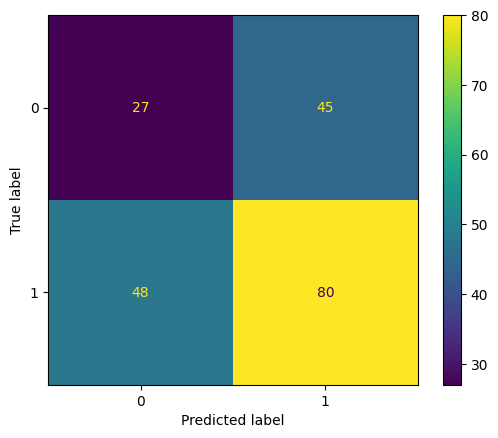

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


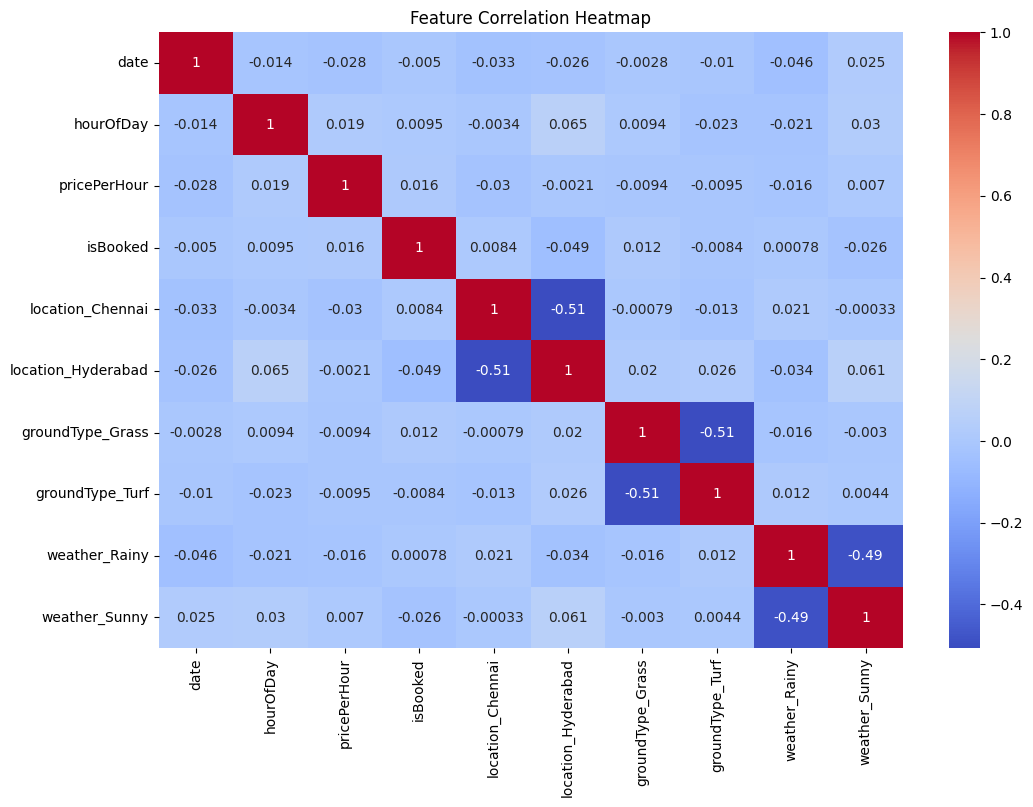

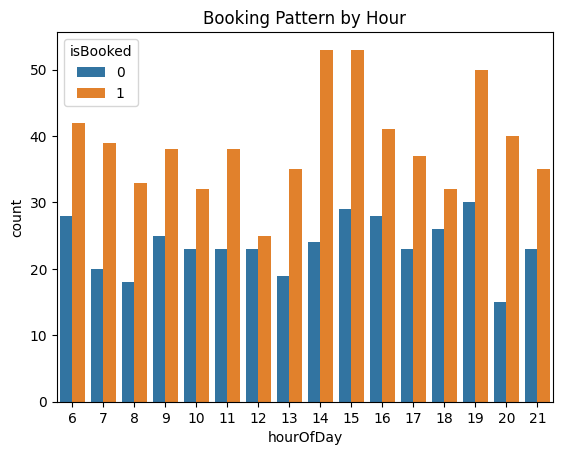

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Booking pattern by hour
sns.countplot(x='hourOfDay', hue='isBooked', data=df)
plt.title('Booking Pattern by Hour')
plt.show()
